In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob as gb

### proc csv

In [2]:
ri='/home/jonathan/PB_tareas/Tarea2/test2/datos'

In [3]:
for yea in range(1990,2024):
    for month in range(12):
        mon='%02d'%(month+1)
        file='%s/era5_%s_%s_inst.nc'%(ri,yea,mon)
        if not os.path.exists(file): continue        
        file1='../out_nc/Lu_%s_%s_.nc'%(yea,mon)
        if not os.path.exists(file1): 
            print(yea,mon)  
            os.system('python obukhov_calculate.py %s'%file)
        file2='../out_csv/neutral_%s%s.csv'%(yea,mon)
        if not os.path.exists(file2): os.system('python save_events.py %s'%file1)        

2002 08
Linv - Max: 1.721e+00, Min: -1.000e+02, Mean: 2.434e-02
2002 09
Linv - Max: 1.422e+00, Min: -1.000e+02, Mean: 3.907e-02
2002 10
Linv - Max: 1.049e+00, Min: -3.068e+01, Mean: 1.461e-02
2002 11
Linv - Max: 1.869e+00, Min: -6.812e+00, Mean: 1.638e-02
2002 12
Linv - Max: 1.296e+01, Min: -1.000e+02, Mean: 2.466e-02
2003 01
Linv - Max: 6.418e+00, Min: -8.473e+01, Mean: 5.244e-02
2003 02
Linv - Max: 2.903e+00, Min: -1.000e+02, Mean: 4.747e-02
2003 03
Linv - Max: 2.266e+00, Min: -7.242e+01, Mean: 4.118e-02
2003 04
Linv - Max: 7.405e+00, Min: -9.323e+01, Mean: 8.367e-02
2003 05
Linv - Max: 3.877e+00, Min: -1.000e+02, Mean: 9.008e-02
2003 06
Linv - Max: 3.481e+00, Min: -1.000e+02, Mean: 1.285e-01
2003 07
Linv - Max: 8.576e-01, Min: -1.740e+01, Mean: 3.496e-02
2003 08
Linv - Max: 7.510e-01, Min: -7.013e+01, Mean: 3.077e-02
2003 09
Linv - Max: 1.701e+00, Min: -4.163e+01, Mean: 2.025e-02
2003 10
Linv - Max: 9.394e-01, Min: -3.441e+01, Mean: 1.943e-02
2003 11
Linv - Max: 1.582e+00, Min: -2.4

### count

In [4]:
def plot1(dataframe):
    fig=plt.figure(figsize=(6,3))
    plt.pcolormesh(dataframe,cmap='turbo')
    plt.colorbar(label='[%]')
    plt.ylabel('months')
    plt.xlabel('hours')
    return fig

In [5]:
def p01_merge(files):
    for i,file in enumerate(files):
        df=pd.read_csv(file,index_col='year_month')
        if i==0: df1=df.copy()
        else: df1=pd.concat([df1,df],axis=0)
    df1.index=pd.to_datetime(df1.index)    
    return df1

In [6]:
def p02_porcentaje(df1):
    # Agrupar por número de mes (1 a 12) y calcular el promedio
    df_sum = df1.groupby(df1.index.month).sum()
    df_sum.index.name = 'month'
    df_dias = (df1*0+1).mul(df1.index.days_in_month, axis=0)
    df_dias.index=pd.to_datetime(df_dias.index)
    df_nsum = df_dias.groupby(df_dias.index.month).sum()
    df_nsum.index.name = 'month'
    df0=100*df_sum/df_nsum
    return df0

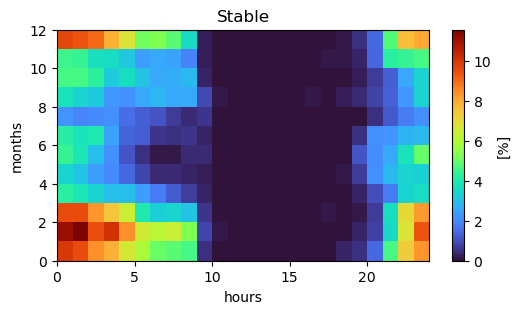

In [13]:
tipo='stable' #'neutral','stable','unstable'
files=sorted(gb('../out_csv/%s_*'%(tipo)))
dfi=p01_merge(files)
stable=p02_porcentaje(dfi)
fig=plot1(stable)
plt.title(tipo.capitalize())
fig.savefig('../salidas/%s_35years.png'%tipo, dpi=200, bbox_inches='tight')

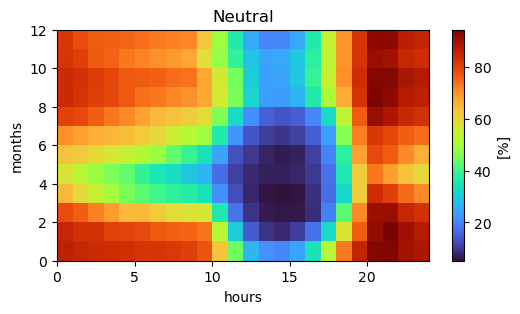

In [14]:
tipo='neutral' #'neutral','stable','unstable'
files=sorted(gb('../out_csv/%s_*'%(tipo)))
dfi=p01_merge(files)
neutral=p02_porcentaje(dfi)
fig=plot1(neutral)
plt.title(tipo.capitalize())
fig.savefig('../salidas/%s_35years.png'%tipo, dpi=200,bbox_inches='tight')

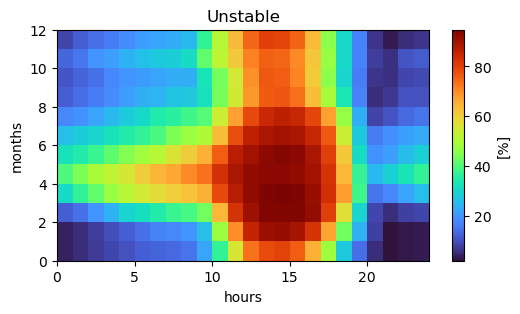

In [15]:
tipo='unstable' #'neutral','stable','unstable'
files=sorted(gb('../out_csv/%s_*'%(tipo)))
dfi=p01_merge(files)
unstable=p02_porcentaje(dfi)
fig=plot1(unstable)
plt.title(tipo.capitalize())
fig.savefig('../salidas/%s_35years.png'%tipo, dpi=200,bbox_inches='tight')

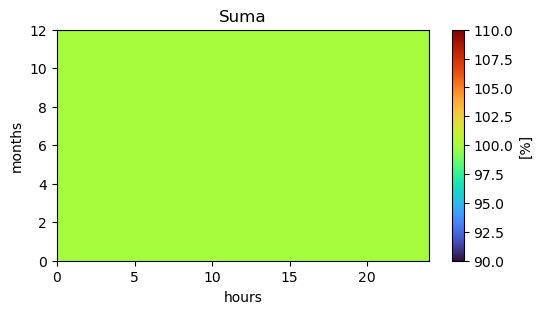

In [11]:
fig=plot1(stable+unstable+neutral)
plt.title('Suma')
fig.savefig('../salidas/suma_35years.png', dpi=200,) #bbox_inches='tight')